# Proyecto: Predicci√≥n de Alertas T√©rmicas mediante Aprendizaje Autom√°tico

Alumno: Mariano Buet

Se propone desarrollar un modelo de clasificaci√≥n multiclase que prediga tres tipos de estados t√©rmicos ‚Äîriesgo de helada, clima de confort y riesgo de sobrecalor‚Äî a partir de variables meteorol√≥gicas.
El objetivo principal es anticipar condiciones extremas para apoyar la toma de decisiones preventivas en distintos √°mbitos: agr√≠cola (proteger cultivos), dom√©stico (evitar congelamiento de ca√±er√≠as) e industrial (ajustar sistemas de ventilaci√≥n o riego)

In [6]:
# Librer√≠as principales
import pandas as pd
import numpy as np

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Leer el archivo Excel directamente desde GitHub
url = "https://github.com/MarianoBuet/Aprendizaje-Autom-tico/raw/main/Entregas_Parcial/datos/Estad%C3%ADsticas%20normales%20Datos%20abiertos%201991-2020%20-%20AJUSTADO.xlsx"

df = pd.read_excel(url,header=0)
# Mostrar las primeras filas
df.head()

Estacion  Mes  Dias de Lluvia  Humeda  Nubosidad  Precipitacion  \
0  AEROPARQUE AERO  Ene             6.7    67.0        3.1          117.5   
1  AEROPARQUE AERO  Feb             6.0    69.8        3.2          112.3   
2  AEROPARQUE AERO  Mar             5.9    71.3        3.1          111.8   
3  AEROPARQUE AERO  Abr             6.6    73.6        3.5          108.3   
4  AEROPARQUE AERO  May             5.0    76.4        4.0           83.3   

   Temp Media  Temp Max  Temp Min  Viento Objetivo  
0        24.5      28.4      20.8    16.8   NORMAL  
1        23.7      27.3      20.2    15.8   NORMAL  
2        22.0      25.5      18.8    14.9   NORMAL  
3        18.5      22.0      15.3    13.9   NORMAL  
4        15.2      18.4      12.3    12.9   NORMAL

In [8]:
# Mostrar columnas y primeras filas
print("Columnas:")
print(df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

Columnas:
['Estacion', 'Mes', 'Dias de Lluvia', 'Humeda', 'Nubosidad', 'Precipitacion', 'Temp Media', 'Temp Max', 'Temp Min', 'Viento', 'Objetivo']

Primeras filas:
          Estacion  Mes  Dias de Lluvia  Humeda  Nubosidad  Precipitacion  \
0  AEROPARQUE AERO  Ene             6.7    67.0        3.1          117.5   
1  AEROPARQUE AERO  Feb             6.0    69.8        3.2          112.3   
2  AEROPARQUE AERO  Mar             5.9    71.3        3.1          111.8   
3  AEROPARQUE AERO  Abr             6.6    73.6        3.5          108.3   
4  AEROPARQUE AERO  May             5.0    76.4        4.0           83.3   

   Temp Media  Temp Max  Temp Min  Viento Objetivo  
0        24.5      28.4      20.8    16.8   NORMAL  
1        23.7      27.3      20.2    15.8   NORMAL  
2        22.0      25.5      18.8    14.9   NORMAL  
3        18.5      22.0      15.3    13.9   NORMAL  
4        15.2      18.4      12.3    12.9   NORMAL  


# Analisis General del Set de Datos

Estructura General y tipos de variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Estacion        1171 non-null   object 
 1   Mes             1171 non-null   object 
 2   Dias de Lluvia  1061 non-null   float64
 3   Humeda          1110 non-null   float64
 4   Nubosidad       1166 non-null   float64
 5   Precipitacion   1061 non-null   float64
 6   Temp Media      1167 non-null   float64
 7   Temp Max        1158 non-null   float64
 8   Temp Min        1124 non-null   float64
 9   Viento          708 non-null    float64
 10  Objetivo        1171 non-null   object 
dtypes: float64(8), object(3)
memory usage: 100.8+ KB


Analisis de los valores nulos

In [10]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Estacion            0
Mes                 0
Dias de Lluvia    110
Humeda             61
Nubosidad           5
Precipitacion     110
Temp Media          4
Temp Max           13
Temp Min           47
Viento            463
Objetivo            0
dtype: int64


Analisis de las variables num√©ricas

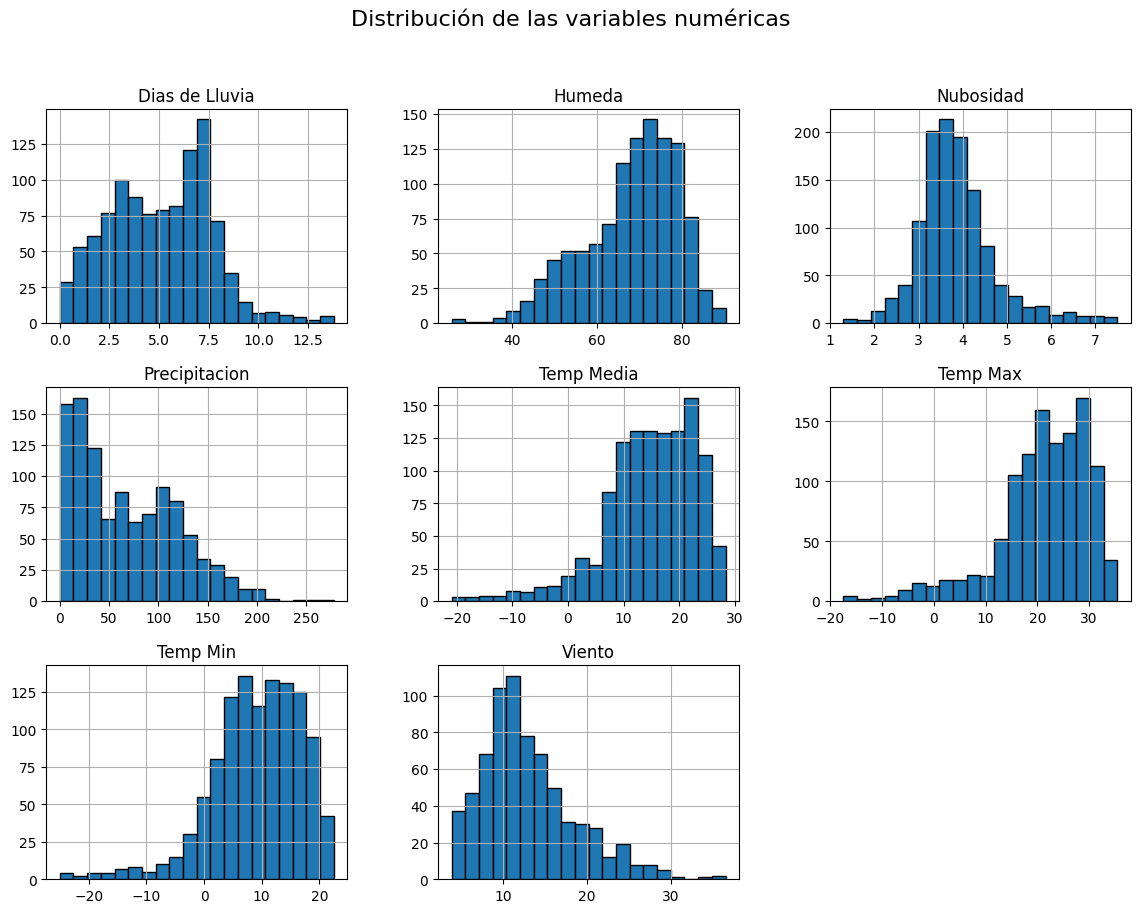

In [11]:
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

df[variables_numericas].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Distribuci√≥n de las variables num√©ricas", fontsize=16)
plt.show()

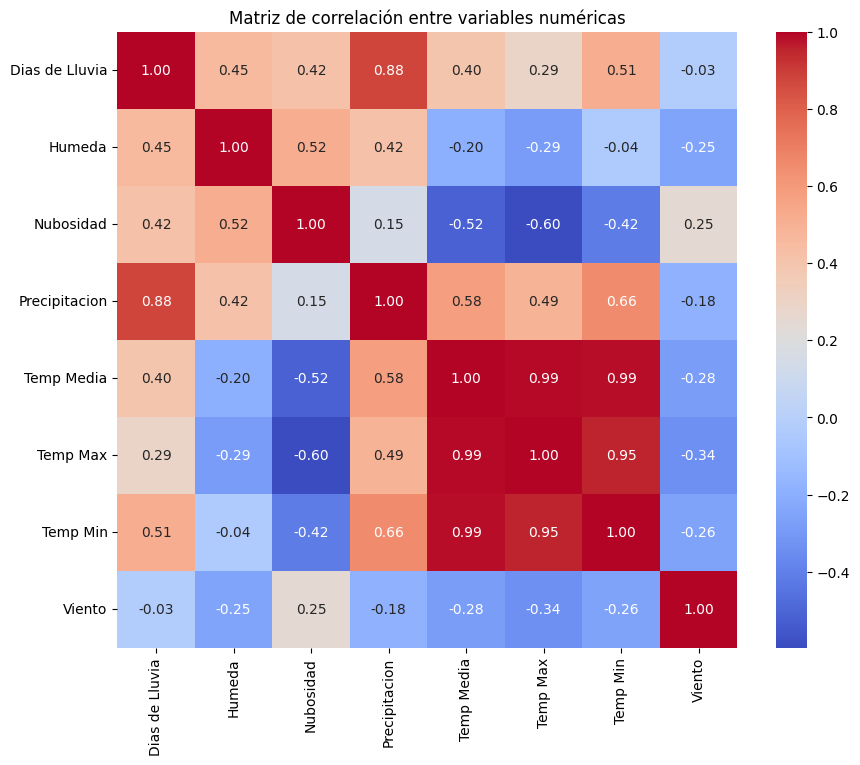

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaci√≥n entre variables num√©ricas")
plt.show()

In [13]:
#  Mostrar columnas con valores nulos
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0]

if faltantes.empty:
    print("‚úÖ No hay valores nulos en el dataset.")
else:
    print("üìä Columnas con valores nulos:")
    display(faltantes)

#  Definir manualmente qu√© columnas usar√°n cada m√©todo


#Columnas que usaran la media
cols_media = ['Temp Media','Viento','Dias de Lluvia']

#Columnas que usaran la mediana
cols_mediana = ['Humeda','Precipitacion']

#Columnas que usaran Moda
cols_moda = ['Temp Min', 'Temp Max','Nubosidad']

#Aplicar Media
for col in cols_media:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"‚úÖ Columna '{col}' completada con la MEDIA ({mean_value:.2f})")
    else:
        print(f"‚ö†Ô∏è La columna '{col}' no existe en el dataset")

# Aplicar Mediana
for col in cols_mediana:
    if col in df.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"‚úÖ Columna '{col}' completada con la MEDIANA ({median_value:.2f})")
    else:
        print(f"‚ö†Ô∏è La columna '{col}' no existe en el dataset")

# 5Ô∏è‚É£ Aplicar Opci√≥n 3 (moda)
for col in cols_moda:
    if col in df.columns:
        moda_series = df[col].mode(dropna=True)
        if len(moda_series) > 0:
            moda_val = moda_series.iloc[0]
            df[col].fillna(moda_val, inplace=True)
            print(f"‚úÖ Columna '{col}' completada con la MODA ({moda_val})")
        else:
            print(f"‚ö†Ô∏è Columna '{col}' no tiene suficiente informaci√≥n para calcular la moda")
    else:
        print(f"‚ö†Ô∏è La columna '{col}' no existe en el dataset")

# 6Ô∏è‚É£ Verificaci√≥n final
faltantes_final = df.isnull().sum()
if faltantes_final.sum() == 0:
    print("\nüéâ Todas las columnas quedaron completas, sin valores nulos.")
else:
    print("\n‚ö†Ô∏è A√∫n quedan valores nulos en las siguientes columnas:")
    print(faltantes_final[faltantes_final > 0])

üìä Columnas con valores nulos:


Dias de Lluvia    110
Humeda             61
Nubosidad           5
Precipitacion     110
Temp Media          4
Temp Max           13
Temp Min           47
Viento            463
dtype: int64

‚úÖ Columna 'Temp Media' completada con la MEDIA (14.83)
‚úÖ Columna 'Viento' completada con la MEDIA (13.01)
‚úÖ Columna 'Dias de Lluvia' completada con la MEDIA (5.10)
‚úÖ Columna 'Humeda' completada con la MEDIANA (70.10)
‚úÖ Columna 'Precipitacion' completada con la MEDIANA (58.90)
‚úÖ Columna 'Temp Min' completada con la MODA (4.9)
‚úÖ Columna 'Temp Max' completada con la MODA (27.9)
‚úÖ Columna 'Nubosidad' completada con la MODA (3.7)

üéâ Todas las columnas quedaron completas, sin valores nulos.


/tmp/ipython-input-3370797599.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-3370797599.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Columnas excluidas: ['Temp Media', 'Temp Max', 'Temp Min']
Shape de X: (1171, 7)

üîπ Accuracy: 0.847

üìä Matriz de confusi√≥n:
 [[  9   0  21]
 [  0  16   4]
 [  7   4 174]]

üìã Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

       CALOR       0.56      0.30      0.39        30
     HELADAS       0.80      0.80      0.80        20
      NORMAL       0.87      0.94      0.91       185

    accuracy                           0.85       235
   macro avg       0.75      0.68      0.70       235
weighted avg       0.83      0.85      0.83       235



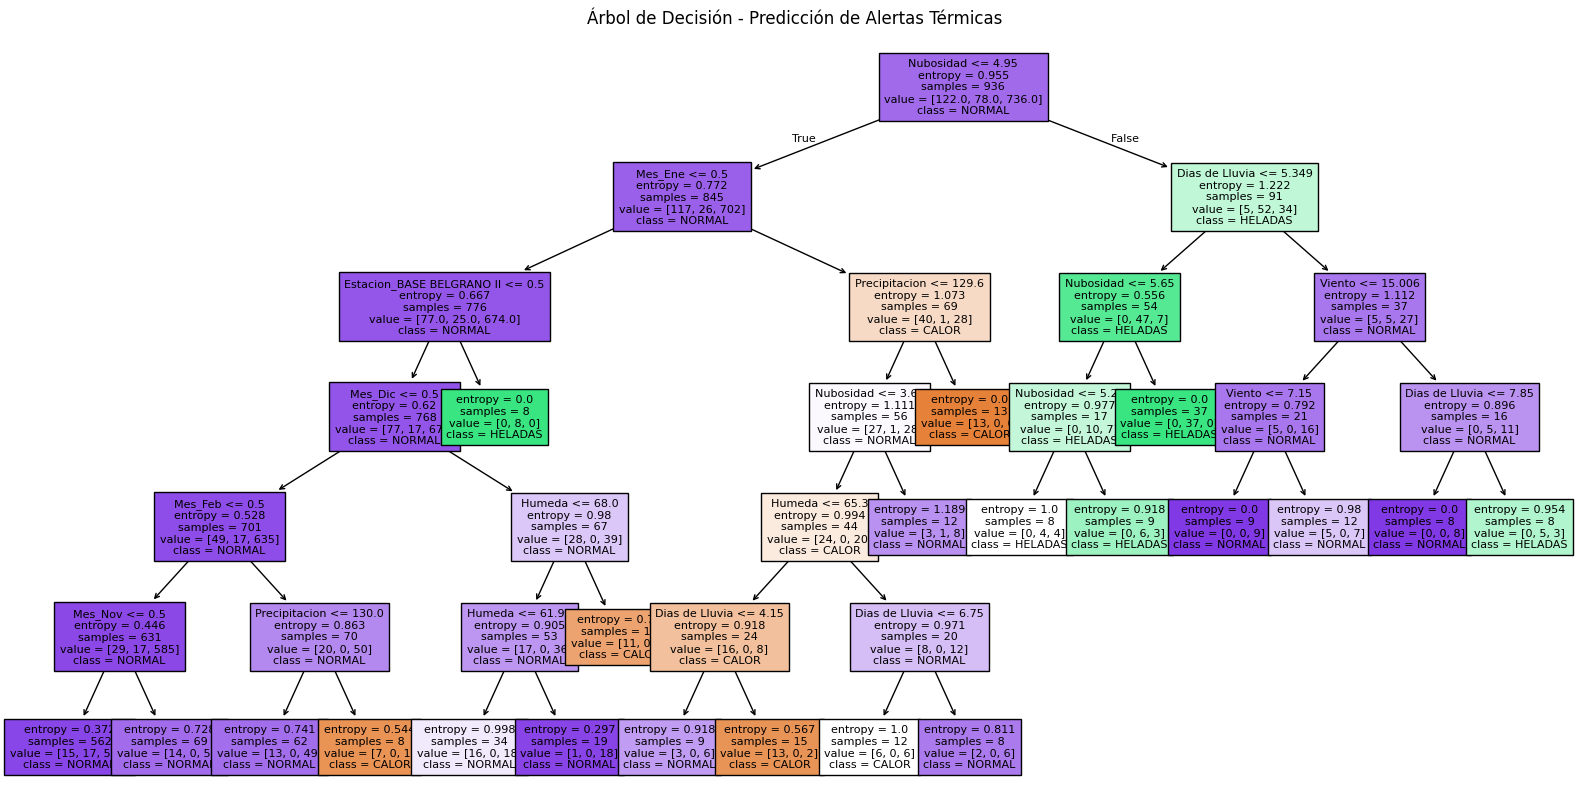

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1Ô∏è‚É£ Definir variable objetivo
TARGET = "Objetivo"  # Cambi√° si tu columna tiene otro nombre

# 2Ô∏è‚É£ Excluir manualmente las tres columnas de temperatura
cols_excluir = ["Temp Media", "Temp Max", "Temp Min"]

# Aseguramos que existan en el dataset antes de eliminarlas
cols_excluir = [c for c in cols_excluir if c in df.columns]

X = df.drop(columns=cols_excluir + [TARGET])
y = df[TARGET]

print("Columnas excluidas:", cols_excluir)
print("Shape de X:", X.shape)

# 3Ô∏è‚É£ Tratamiento b√°sico de nulos
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

# Rellenar nulos
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
for c in cat_cols:
    X[c] = X[c].fillna(X[c].mode()[0])

# 4Ô∏è‚É£ Codificar variables categ√≥ricas
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5Ô∏è‚É£ Divisi√≥n Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6Ô∏è‚É£ Entrenar el √°rbol
modelo_dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_leaf=8,
    random_state=42
)
modelo_dtree.fit(X_train, y_train)

# 7Ô∏è‚É£ Evaluaci√≥n
y_pred = modelo_dtree.predict(X_test)
print("\nüîπ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nüìä Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("\nüìã Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

# 8Ô∏è‚É£ Importancia de variables
importances = pd.Series(modelo_dtree.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
importances.sort_values(ascending=False).head(15).plot(kind='barh', color='skyblue')
plt.title("Top 15 variables m√°s importantes (sin temperaturas)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

# 9Ô∏è‚É£ Visualizaci√≥n del √°rbol
plt.figure(figsize=(20,10))
plot_tree(modelo_dtree,
          feature_names=X.columns,
          class_names=[str(c) for c in sorted(y.unique())],
          filled=True, fontsize=8)
plt.title("√Årbol de Decisi√≥n - Predicci√≥n de Alertas T√©rmicas")
plt.show()